## No Show Appointments

I have selected the no show appointments data for my analysis

Using data analysis, we will attempt to answer the following questions:
•	Which days are patients most likely to book appointments? Does this have any impact on the likelihood of them attending their appointment?
•	How far in advance are these patients booking their appointments?
•	Are men and women equally as likely to show up to their appointments?
•	Does age play a role in determining whether a patient will no show?


In [1]:
#We begin by importing all of the libraries that we will be needing as well as well as reading our data file
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
import seaborn as sns
from __future__ import division

filename = 'Downloads/noshowappointments.csv'
appt = pd.read_csv(filename)

appt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
#After examining the columns i noticed that some of the headers had typos so I am correcting them
appt.rename(columns = {'Hipertension': 'Hypertension',                         
                         'Handcap': 'Handicapped'}, inplace = True)
print(appt.columns)

Index([u'PatientId', u'AppointmentID', u'Gender', u'ScheduledDay',
       u'AppointmentDay', u'Age', u'Neighbourhood', u'Scholarship',
       u'Hypertension', u'Diabetes', u'Alcoholism', u'Handicapped',
       u'SMS_received', u'No-show'],
      dtype='object')


In [3]:
#Here I am converting the date to Numpy's datetime 64 format
appt.ScheduledDay = appt.ScheduledDay.apply(np.datetime64)
appt.AppointmentDay = appt.AppointmentDay.apply(np.datetime64)

print appt['ScheduledDay'].head()
print appt['AppointmentDay'].head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]
0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]


In [4]:
#Creating a new column to find out how many days until the appointment
DaysUntilAppointment = appt.AppointmentDay - appt.ScheduledDay.dt.round('D')
appt['DaysUntilAppointment'] = DaysUntilAppointment
appt['DaysUntilAppointment'] = appt['DaysUntilAppointment'].dt.days
appt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No-show,DaysUntilAppointment
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589980e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262960e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679510e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841190e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [5]:
#Creating a new column to find out what day of the week the appointments are
appt['DayOfTheWeek'] = appt['AppointmentDay'].dt.day_name()
appt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No-show,DaysUntilAppointment,DayOfTheWeek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1,Friday
1,5.589980e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1,Friday
2,4.262960e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1,Friday
3,8.679510e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1,Friday
4,8.841190e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1,Friday


In [6]:
#Sorting the days of the week so they appear in order
appt['DayOfTheWeek'] = pd.Categorical(appt['DayOfTheWeek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered=True)

As part of the data wrangling process I will be printing out unique values to help identify anything that may seem out of ordinary.

In [7]:
#We will now scan for any values that seem out of the ordinary
print 'Age: ',sorted(appt.Age.unique())
print 'Scholarship: ',appt.Scholarship.unique()
print 'Hypertension: ' ,appt.Hypertension.unique()
print 'Diabetes: ',appt.Diabetes.unique()
print 'Alcoholism: ',appt.Alcoholism.unique()
print 'Handicapped: ',appt.Handicapped.unique()
print 'SMS_received: ',appt.SMS_received.unique()
print 'DaysUntilAppointment: ', sorted(appt.DaysUntilAppointment.unique())
print 'DayOfTheWeek: ',appt.DayOfTheWeek.unique()
print 'No-show: ',appt['No-show'].unique()

Age:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Scholarship:  [0 1]
Hypertension:  [1 0]
Diabetes:  [0 1]
Alcoholism:  [0 1]
Handicapped:  [0 1 2 3 4]
SMS_received:  [0 1]
DaysUntilAppointment:  [-7, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 10

There are a few things that stick out to me as glaringly obvious we have a negative value in the age section, we also have ages over 100. For the purpose of this analysis we will stick to ages between 0 and 100. In the DaysUntilAppointment field that I have created there are some negative values so i am also going to be excluding those.

In [8]:
#We will eliminate any ages that are less than 0 and greater than 100 and check to make sure we did this correctly
appt = appt[(appt.Age >= 0) & (appt.Age <= 100)]
print 'Age: ',sorted(appt.Age.unique())

Age:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [9]:
#We will eliminate any rows that have negative values in the DaysToAppointment column and check our work
appt = appt[(appt.DaysUntilAppointment >= 0)]
print 'DaysUntilAppointment: ', sorted(appt.DaysUntilAppointment.unique())

DaysUntilAppointment:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 118, 119, 121, 122, 123, 125, 126, 127, 132, 133, 138, 142, 145, 151, 154, 161, 168, 175, 176, 179]


Now that I have cleaned the data I will be moving on to the analysis phase. The first question I will be looking to answer is:
How far in advance are these patients booking their appointments?

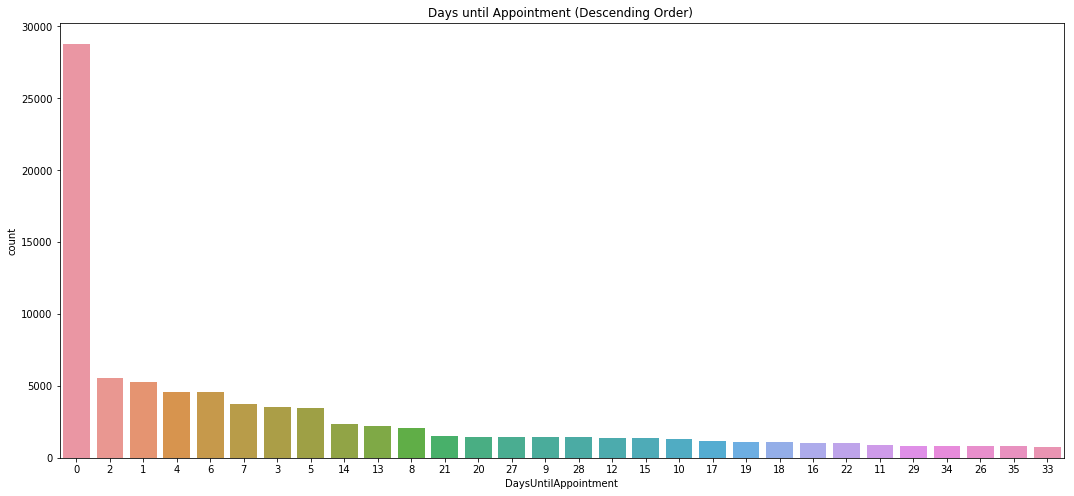

In [10]:
#Create a chart to determine how far in advance they are booking their appointments
plt.figure(figsize=(18,8))
sns.countplot(x=appt.DaysUntilAppointment, order=appt.DaysUntilAppointment.value_counts().iloc[:30].index)
plt.title("Days until Appointment (Descending Order) ")
plt.show()

For readability I have only selected the first 30 values on the X axis. This chart demonstrates that overwhelmingly this patients are booking their appointments same day. One should also note that the 8 highest values all happen to be one week and less. This demonstrates that the majority of patients are scheduling their appointments in the very near future. The limitations of the data are such that we don't have any further information as to why that may be.  

At this point it is important to establish a baseline to understand the likelihood that a patient will attend their appointment across all groups so that we can identify if there are any patterns across different segments of patients. 

In [11]:
#I will now write a function that will allow us to calculate the baseline 
#from future import division
def get_baseline(data):    
    num_of_no = (data['No-show']=='No').sum()    
    num_of_yes = (data['No-show']=='Yes').sum()  
    baseline = num_of_no / (num_of_no + num_of_yes)   
    print "There is a " + "{:.2%}".format(baseline) + " likelihood that the patient will attend their appointment"
    return baseline

There is a 77.92% likelihood that the patient will attend their appointment


0.7792045385225401

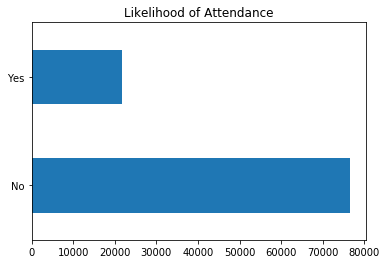

In [12]:
#Creating this plot allows us to visualize the distribution of No-shows/attended
#Please note that in this Data a no indicates the patient attended and yes means they did not attend
def plot_dist(data):
    data['No-show'].value_counts().plot(kind='barh')
    plt.title('Likelihood of Attendance')    
plot_dist(appt)
get_baseline(appt)

When we look at our data on an aggregate basis it appears as though 77.92% of the time our patient will attend their scheduled appointments.

Next we will be examining the distribution of days that patients booked their appointments

Text(0.5,1,'Appointments by Days of the Week - Bar')

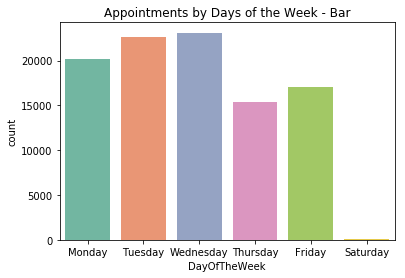

In [13]:
#We will now create a chart to observe the distribution of days that patients book
sns.countplot(x="DayOfTheWeek", data=appt, palette="Set2")
plt.title('Appointments by Days of the Week - Bar')

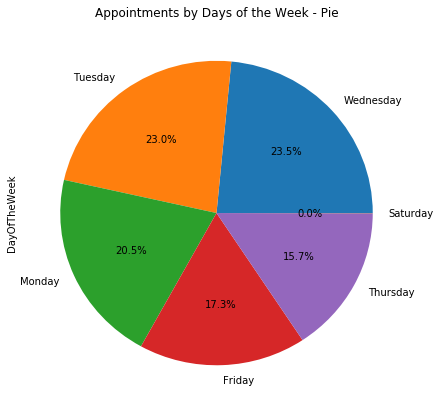

In [14]:
appt.DayOfTheWeek.value_counts().plot.pie(figsize=(7,7), title='Appointments by Days of the Week - Pie', autopct='%1.1f%%')

I have expressed the distribution of appointments by day both as a pie chart and a bar chart to offer up a different view.

In [15]:
#We will create a new dataframe to sort data by Days of the week
d = appt.groupby(['DayOfTheWeek', 'No-show']).size().unstack().reset_index()
d['Total'] = d['No'] + d['Yes'] 
d['No_Show']= d['Yes'] / d['Total']

No-show,DayOfTheWeek,No,Yes,Total,No_Show
0,Monday,15544,4591,20135,0.228011
1,Tuesday,17599,5041,22640,0.222659
2,Wednesday,18165,4935,23100,0.213636
3,Thursday,12189,3231,15420,0.209533
4,Friday,13114,3910,17024,0.229676
5,Saturday,30,9,39,0.230769


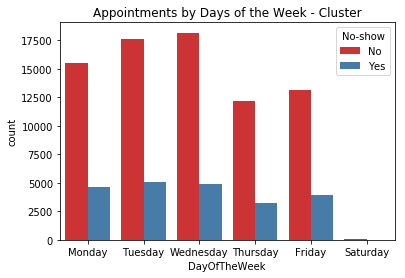

In [16]:
#We will now create a chart to observe the distribution of days that patients book
sns.countplot(x="DayOfTheWeek", data=appt, hue="No-show", palette="Set1")
plt.title('Appointments by Days of the Week - Cluster')
d

There does not appear to be any significant differences in attendance likelihood regardless of the day. However, what is quite clear is that there are no appointments on Sunday, and very few on Saturdays. The appointments top out on Wednesday, then Thursday and Friday see lighter volumes than the rest of the week.

Now we will attempt to determine if there are any differences between genders. Is one gender more likely to attend an appointment than the other?

In [17]:
#We will now split our data by gender
Male_Data = appt.groupby('Gender').get_group('M')
Female_Data = appt.groupby('Gender').get_group('F')

There is a 78.23% likelihood that the patient will attend their appointment
There is a 77.76% likelihood that the patient will attend their appointment


Text(0.5,1,'Appointment attendance by gender')

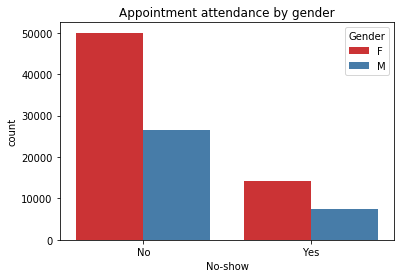

In [18]:
#We will now run our baseline function on the two data sets and plot our data
get_baseline(Male_Data)
get_baseline(Female_Data)

sns.countplot(x="No-show", hue="Gender", data=appt, palette="Set1")
plt.title('Appointment attendance by gender')

The data demonstrates to us that we have more female data than men. However, there is very little difference in attendance rates between men and women. My assumption is that gender is not much of a factor in determining whether a patient is likely to miss their appointment.

We will now try to determine whether there are patterns of attendance over different age groups. Does age play a role in determining whether a patient will no show?

In [19]:
#We must first split our patients into different age categories before we can chart them
def group_by_age(Age):
    if Age >= 80:
        return "Old Age"
    elif Age >= 60:
        return "Senior"
    elif Age >= 40:
        return "Adult"
    elif Age >= 20:
        return "Young Adult"
    else:
        return "Youth"
    
appt['AgeGroup'] = appt.Age.apply(group_by_age)

In [20]:
#We will now split our data by age groups
Senior_Data = appt.groupby('AgeGroup').get_group('Senior')
Young_Adult_Data = appt.groupby('AgeGroup').get_group('Young Adult')
Youth_Data = appt.groupby('AgeGroup').get_group('Youth')
Adult_Data = appt.groupby('AgeGroup').get_group('Adult')
Old_Age_Data = appt.groupby('AgeGroup').get_group('Old Age')

In [21]:
#I'm creating functions to count the yes and no distribution to create stacked bar charts
def get_yes(data):    
    num_of_no1 = (data['No-show']=='No').sum()
    num_of_yes1 = (data['No-show']=='Yes').sum()
    dist_yes = (num_of_yes1 / (num_of_no1 + num_of_yes1)) * 100
    return dist_yes

def get_no(data):    
    num_of_no1 = (data['No-show']=='No').sum()
    num_of_yes1 = (data['No-show']=='Yes').sum()
    dist_no = (num_of_no1 / (num_of_no1 + num_of_yes1)) * 100
    return dist_no

In [22]:
#We will create a new dataframe for a scatter plot
sp = appt.groupby(['Age', 'No-show']).size().unstack().reset_index()
sp['Total'] = sp['No'] + sp['Yes'] 
sp['WillShow'] = sp['No'] / sp['Total']

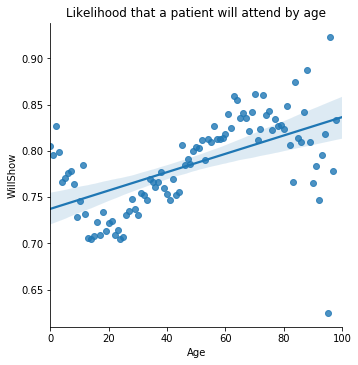

In [23]:
#We will now chart a scatterplot
sns.lmplot(data = sp, x = 'Age', y = 'WillShow')
plt.title('Likelihood that a patient will attend by age')
plt.xlim(0, 100)
plt.show()

In [24]:
#We will create a new dataframe to sort data by Age group
g = appt.groupby(['AgeGroup', 'No-show']).size().unstack().reset_index()
g['Total'] = g['No'] + g['Yes'] 
g['No_Show']= g['Yes'] / g['Total']

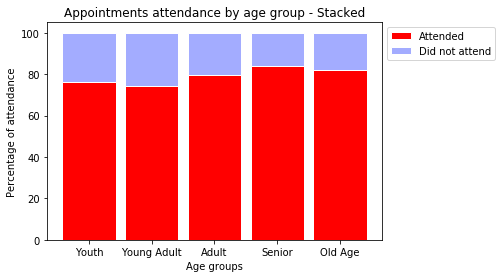

No-show,AgeGroup,No,Yes,Total,No_Show
0,Adult,21329,5546,26875,0.206363
1,Old Age,2455,540,2995,0.180301
2,Senior,13541,2637,16178,0.162999
3,Young Adult,18878,6563,25441,0.257969
4,Youth,20438,6431,26869,0.239346


In [25]:
#I will now create my chart
r = [0,1,2,3,4]
groups = [Youth_Data, Young_Adult_Data, Adult_Data, Senior_Data, Old_Age_Data]
nos = []
for i in groups:
    nos.append(get_no(i))
yes = []
for i in groups:
    yes.append(get_yes(i))

#indicating the details of our chart, bar width, location of data, labels
barWidth = 0.85
names = ('Youth','Young Adult','Adult','Senior','Old Age')
plt.bar(r, nos, color='r', edgecolor='white', width=barWidth, label="Attended")
plt.bar(r, yes, bottom=nos, color='#a3acff', edgecolor='white', width=barWidth, label="Did not attend")

#Here we are creating the informative pieces for our data, legend, title, labels for x/y axis
plt.xticks(r, names)
plt.xlabel("Age groups")
plt.ylabel("Percentage of attendance")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Appointments attendance by age group - Stacked')

plt.show()
g

When examining the results, it appears as though as patients age the likelihood of them missing appointments decreases. Age seems to be the most relevant factor in determining causation for missed appointments. My assumption is that as you age the reasons you go to the doctor tend to be more serious than when you are younger. The old age category seems to oppose that theory however the amount of old age records are significantly lower than all other categories.

### Conclusions

After examining the appointment data for over 100,000 Brazilian medical records there are certain reasonable conclusions that can be drawn based on the data that we were given:
•	My first observation is that patients book the majority of their appointments within less than 7 days. 
•	An overwhelming amount of appointments are booked same day. 
•	They also prefer their appointments to be early in the week, Monday through Wednesday account for over 60% of appointments. •	There are no appointments on Sundays and almost none on Saturdays
•	Days of the week does not correlate with an increased risk of No-Showing
•	Age was the best predictor of whether or not a patient was likely to show up

Athough age was a good predictor this data set doesn't paint the full picture. It forces us to assume and extrapolate rather than providing the necessary details to further understand what drives humans to miss their appointments. 



### Limitations and Missing Information

While researching the distribution of days until appointment or said another way, amount of time between the day the patient scheduled the appointment and the actual appointment date itself. I noticed that majority were same day appointments and I wonder could these be walk in patients? It would be nice if we were being given that information as the likelihood of a walk in patient no showing is almost none therefore this could seriously compromise the integrity of the analysis. I have included a list of some other information that in my opinion could enable us to do a more comprehensive analysis.
A few limitations of the data include but are not limited to:
•	Reason for appointment, this could help us dive deeper to better understand are patients skipping less important appointments
•	Type of doctor, are attendance rates the same for all types of doctors?
•	Last visit to doctor, can further help us segment and profile our patients better
•	Did they cancel their last appointment made? Are patients who skipped their last appointments more likely to skip their next?
•	Mode of transportation, to see whether or not transportation is a barrier for some patients
